## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [47]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [48]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('../Resources/bitstamp.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [49]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [50]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('../Resources/coinbase.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


In [51]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [52]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame 
# In this particular data set, I used the .describe() funtion and discovered that there are 
# 129067 rows of data.  After using the .dropna() function below, it was determined that there
# was no missing data as there remain 129067 rows.
bitstamp.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [53]:
# Use the str.replace function to remove the dollar sign, $ from the "Close" column.  The "head()" function displays the 
# first 5 rows, indicating no sign of the "$.""
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")

bitstamp.head()

C:\Users\ToddGarner\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [54]:
# Convert the Close data type to a float.  Utilizing the dtypes, we can see that all of the header elements are float64 type.  
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [55]:
# Review the data for duplicate values, and drop them if necessary.  By using the 
# describe() function, we can see that there are still 129067 rows indicating that
# there were no duplicates.  
duplicates_1 = bitstamp.drop_duplicates()

duplicates_1.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [56]:
# Repeat Steps 1–4 for the coinbase DataFrame.  Using the .describe() function before removing the NaN data. 
# This indicated that there were 129322 rows. After running the .dropna() function this same number of rows
# remain.  But, an odd occurence is that the describe() function somehow does not capture the "Close" column 
# of data, as seen below.  
# coinbase
coinbase.dropna()
coinbase.describe()

# From the .describe() function, we can see that this database does not appear to be a column of "Close" data. 
# But, when we use the .dtypes function, we can see that there is indeed a "Close" column but possibly contains
# no data.  Thus, there's no need to run the following functions that have been commented out.  
# 
# coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")
# coinbase.describe()

# There is no "Close" date column to convert to float to let's use the .dtypes to see what the remaining
# columns contain.  
# coinbase.dtypes

,Open,High,Low,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,959.084903,1.152334e+07,17177.995495


In [57]:
# From the .describe() function, we can see that this database does not appear to be a column of "Close" data. 
# But, when we use the .dtypes function, we can see that there is indeed a "Close" column but possibly contains
# no data.  However, on inspection of the raw database "coinbase.csv" there does indeed exist a column of data
# for "Close."  And, it does contain "$", so the process continues.  
# 
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")
coinbase.describe()

# Again, there is no "Close" column showing when using the .describe() function.  But, we know it's there and 
# now we've removed the "$".  
# 
# 
# coinbase.dtypes

C:\Users\ToddGarner\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Open,High,Low,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,959.084903,1.152334e+07,17177.995495


In [58]:
# As seen below in step 32, the Close column does indeed exist and is an object.
# So, we will transform it to "float"
#
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
coinbase.dtypes

# We can see that our operation was successful as the "Close" column is now "float64"

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [59]:
# In this step, we will remove any duplicates in the same manner as above for bitstamp.
#
duplicates_1 = coinbase.drop_duplicates()

duplicates_1.describe()
#
# There appear to be no duplicates as the number of rows remains the same.  As you can see
# below, the "Close" column does indeed exist and is somehow presented using the .describe()
# function, but on a different variable "duplicates_1."  I cannot explain why this is occurring.

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


In [60]:
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [61]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp['Close'].loc[:]
# .plot(legend=True, figsize=(15, 10), title="One Month: Bitcoin_1 v. Bitcoin_2",

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [62]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase['Close'].loc[:]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [63]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()
#bitcoin_1['Close'].loc[: ].plot(legend=True, figsize=(15, 10), title="Closing Prices of Bitstamp", color="blue", label="BTS 1")


count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [64]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitcoin - Bitstamp Prices'}, xlabel='Timestamp'>

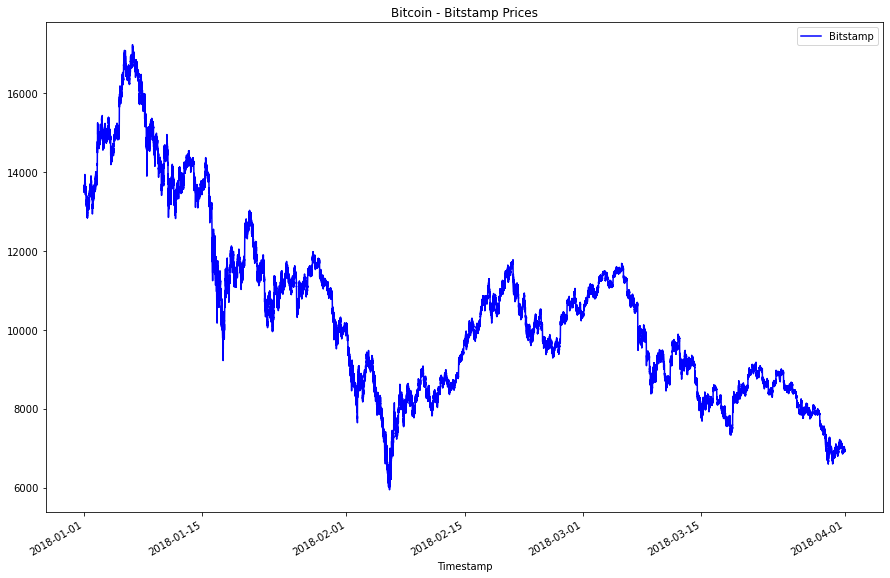

In [74]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp['Close'].loc[: ].plot(legend=True, figsize=(15, 10), title="Bitcoin - Bitstamp Prices", color="blue", label="Bitstamp")


<AxesSubplot:title={'center':'Bitcoin - Coinbase Prices'}, xlabel='Timestamp'>

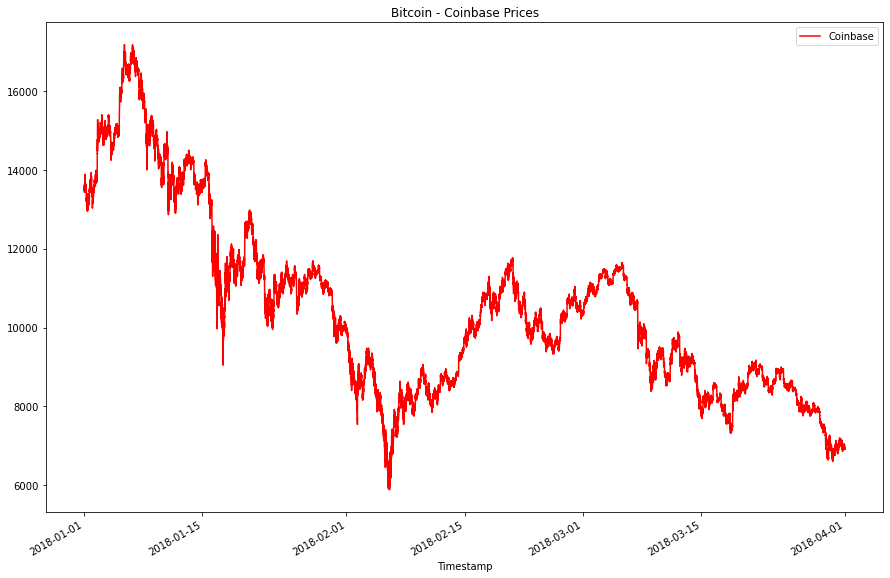

In [75]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase['Close'].loc[: ].plot(legend=True, figsize=(15, 10), title="Bitcoin - Coinbase Prices", color="Red", label="Coinbase")


<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

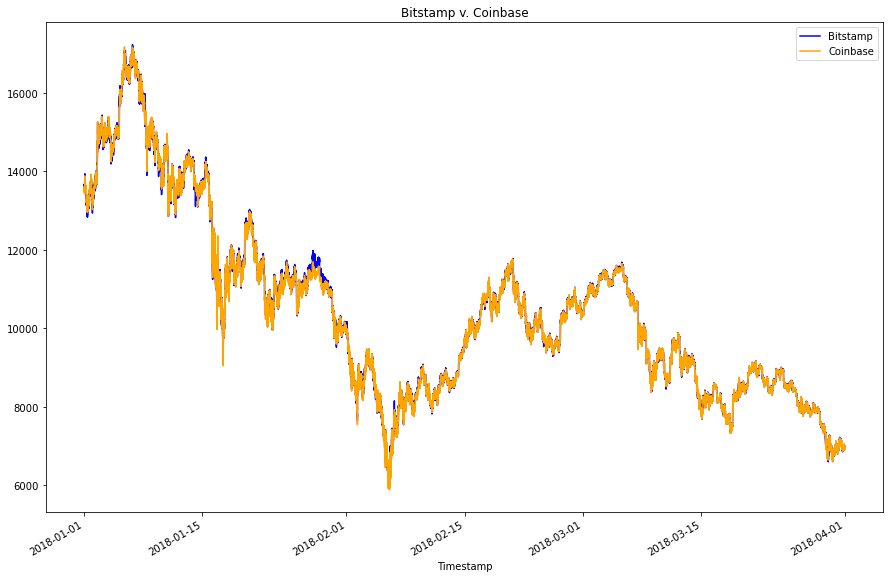

In [76]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase['Close'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'One Month: Bitstamp v. Coinbase'}, xlabel='Timestamp'>

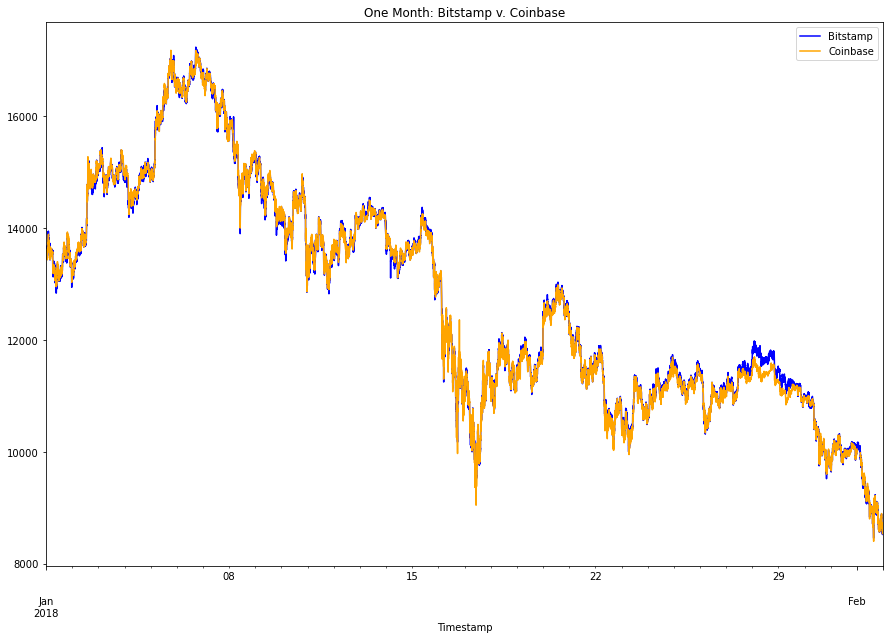

In [86]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].loc['2018-01-01': '2018-02-01'].plot(legend=True, figsize=(15, 10), title="One Month: Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-01-01': '2018-02-01'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'One Month: Bitstamp v. Coinbase'}, xlabel='Timestamp'>

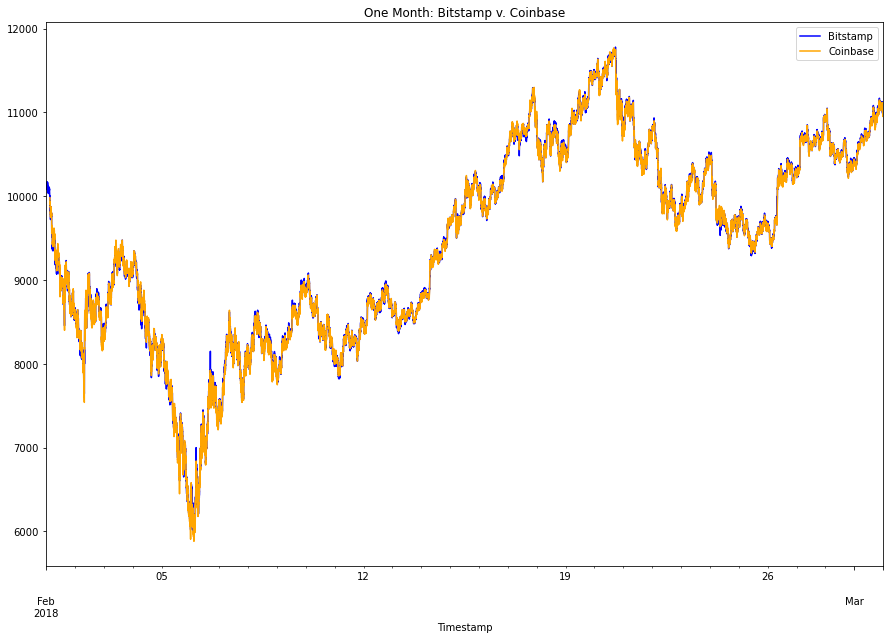

In [87]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp['Close'].loc['2018-02-01': '2018-03-01'].plot(legend=True, figsize=(15, 10), title="One Month: Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-02-01': '2018-03-01'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** It would appear that the spreads have tightened from January to February.  

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'January 15, 2018: Bitstamp v. Coinbase'}, xlabel='Timestamp'>

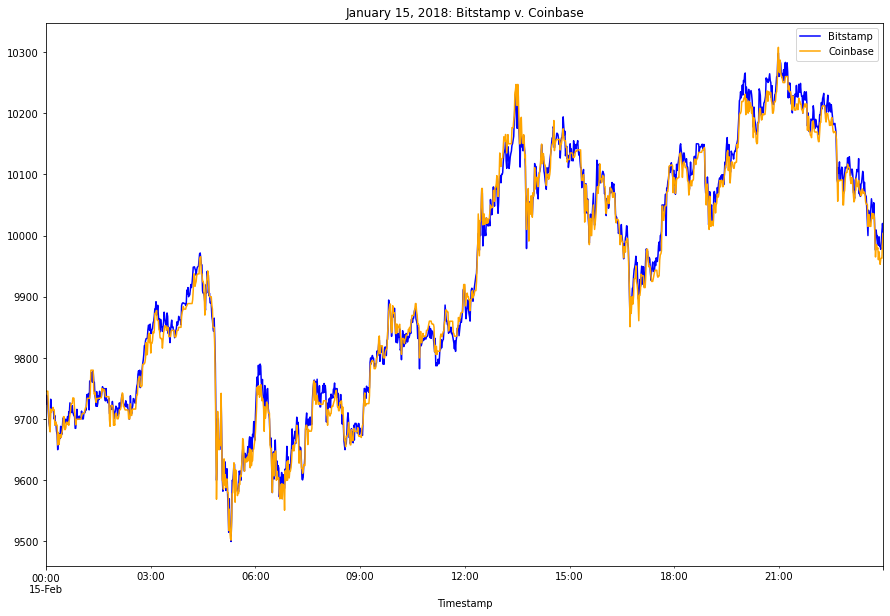

In [88]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-02-15': '2018-02-15'].plot(legend=True, figsize=(15, 10), title="January 15, 2018: Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-02-15': '2018-02-15'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'February 15, 2018: Bitstamp v. Coinbase'}, xlabel='Timestamp'>

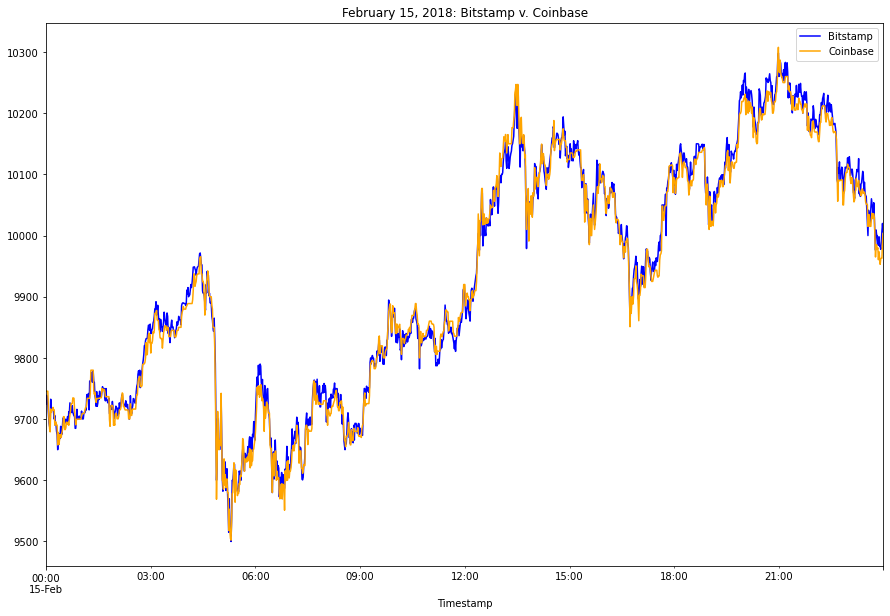

In [93]:
# Middle Date in the data set.  
bitstamp['Close'].loc['2018-02-15': '2018-02-15'].plot(legend=True, figsize=(15, 10), title="February 15, 2018: Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-02-15': '2018-02-15'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'March 31, 2018: Bitstamp v. Coinbase'}, xlabel='Timestamp'>

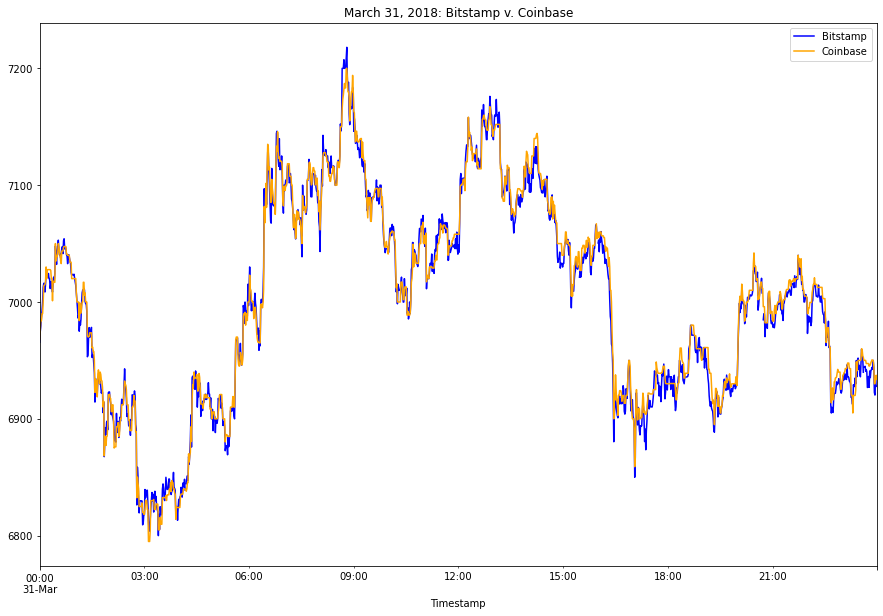

In [92]:
# Plot of a date toward the end of the data sets.
bitstamp['Close'].loc['2018-03-31': '2018-03-31'].plot(legend=True, figsize=(15, 10), title="March 31, 2018: Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-03-31': '2018-03-31'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [96]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-15': '2018-03-31'] - coinbase['Close'].loc['2018-01-15': '2018-03-31']
arbitrage_spread_early.describe()

# Generate summary statistics for the early DataFrame
# YOUR CODE HERE

count    108732.000000
mean         13.498458
std          41.212342
min        -606.800000
25%          -3.630000
50%           7.040000
75%          20.230000
max         439.010000
Name: Close, dtype: float64

<AxesSubplot:>

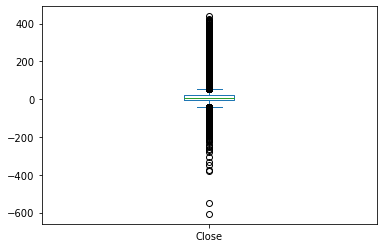

In [99]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind = "box")


<AxesSubplot:title={'center':'February 15, 2018: Bitstamp v. Coinbase'}, xlabel='Timestamp'>

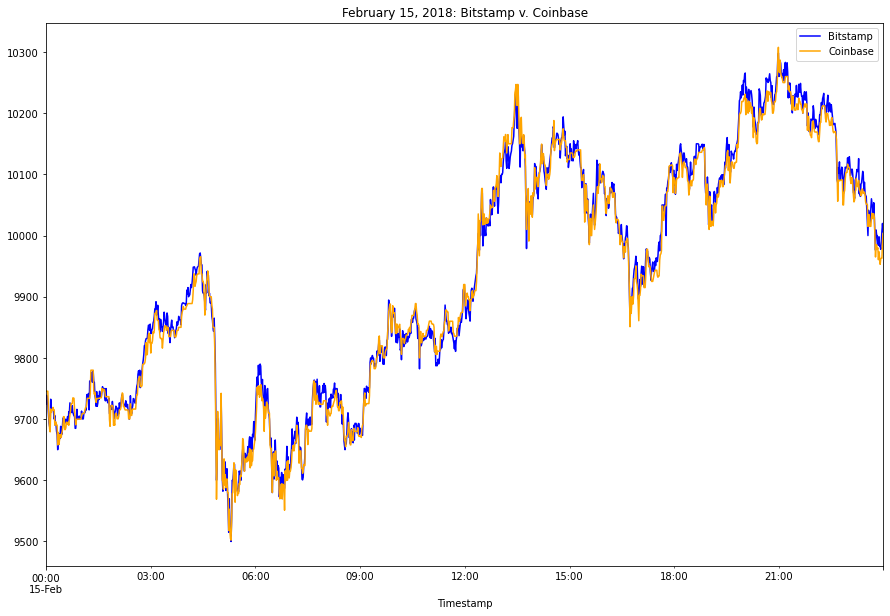

In [100]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-02-15': '2018-02-15'].plot(legend=True, figsize=(15, 10), title="February 15, 2018: Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-02-15': '2018-02-15'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")



In [101]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp['Close'].loc['2018-02-15': '2018-02-15'] - coinbase['Close'].loc['2018-02-15': '2018-02-15']


# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1440.000000
mean        5.760007
std        14.908671
min       -48.800000
25%        -3.995000
50%         6.960000
75%        16.217500
max        55.470000
Name: Close, dtype: float64

<AxesSubplot:>

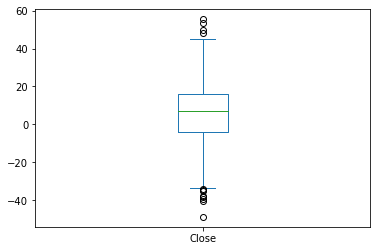

In [102]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind = "box")

<AxesSubplot:title={'center':'March 31, 2018: Bitstamp v. Coinbase'}, xlabel='Timestamp'>

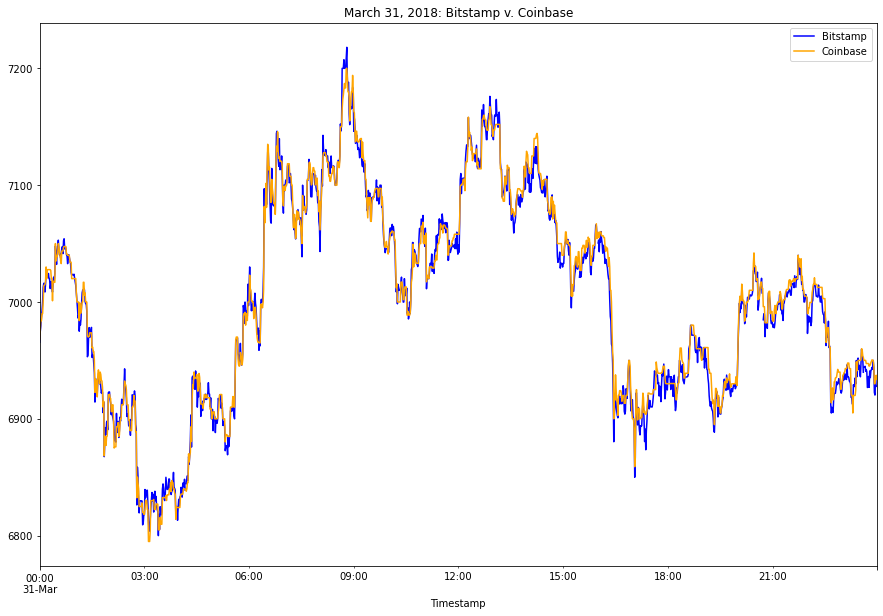

In [103]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-03-31': '2018-03-31'].plot(legend=True, figsize=(15, 10), title="March 31, 2018: Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-03-31': '2018-03-31'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")


In [104]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-31': '2018-03-31'] - coinbase['Close'].loc['2018-03-31': '2018-03-31']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1434.000000
mean       -2.348675
std         8.109623
min       -35.980000
25%        -7.627500
50%        -2.300000
75%         2.537500
max        35.000000
Name: Close, dtype: float64

<AxesSubplot:>

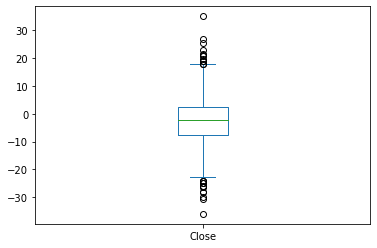

In [105]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind = "box")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [114]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-15': '2018-01-15'] - coinbase['Close'].loc['2018-01-15': '2018-01-15']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
profitable_trades_early = arbitrage_spread_early[arbitrage_spread_early > .01]
profitable_trades_early.describe()

count    1166.000000
mean       42.124322
std        22.912901
min         0.010000
25%        26.315000
50%        40.290000
75%        56.150000
max       170.980000
Name: Close, dtype: float64

In [113]:
# For the middle date in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = bitstamp['Close'].loc['2018-02-15'] - coinbase['Close'].loc['2018-02-15']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
profitable_trades_middle = arbitrage_spread_middle[arbitrage_spread_middle > .01]
profitable_trades_middle.describe()

count    970.000000
mean      13.963979
std        9.337793
min        0.010000
25%        6.715000
50%       12.735000
75%       19.667500
max       55.470000
Name: Close, dtype: float64

In [115]:
# For the late date in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-31'] - coinbase['Close'].loc['2018-03-31']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
profitable_trades_late = arbitrage_spread_late[arbitrage_spread_late > .01]
profitable_trades_late.describe()

count    514.000000
mean       5.905233
std        4.905227
min        0.010000
25%        2.042500
50%        4.820000
75%        8.777500
max       35.000000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [117]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] / coinbase['Close'].loc['2018-01-15']

# Create a profitable_trades DataFrame
# Show only those trades where the spread_return is greater than 1% (.01)
profitable_trades_early = spread_return_early[spread_return_early > .01]


# Print the summary statistics for the profitable_trades DataFrame
profitable_trades_early.describe()

count    5.000000
mean     0.010942
std      0.000736
min      0.010075
25%      0.010570
50%      0.010843
75%      0.011180
max      0.012042
Name: Close, dtype: float64

In [128]:
# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0] / coinbase['Close'].loc['2018-02-15']

# Create a profitable_trades DataFrame
# Show only those trades where the spread_return is greater than 1% (.01)
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]


# Print the summary statistics for the profitable_trades DataFrame
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [129]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / coinbase['Close'].loc['2018-03-31']

# Create a profitable_trades DataFrame
# Show only those trades where the spread_return is greater than 1% (.01)
profitable_trades_late = spread_return_late[spread_return_late > .01]


# Print the summary statistics for the profitable_trades DataFrame
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [120]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()



Timestamp
2018-01-15 09:01:00    0.010570
2018-01-15 09:02:00    0.010075
2018-01-15 09:03:00    0.011180
2018-01-15 09:05:00    0.012042
2018-01-15 09:06:00    0.010843
Name: Close, dtype: float64

In [122]:
# For the date middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [123]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [124]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Print the summary statistics for the profitable_trades DataFrame
profitable_trades_early.describe()

count    5.000000
mean     0.010942
std      0.000736
min      0.010075
25%      0.010570
50%      0.010843
75%      0.011180
max      0.012042
Name: Close, dtype: float64

In [125]:
# For the date middle in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Print the summary statistics for the profitable_trades DataFrame
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [126]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Print the summary statistics for the profitable_trades DataFrame
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [134]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase['Close'].loc['2018-01-15']
profit_early

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_early.sum()



776.1299999999992

In [135]:
# View the early profit DataFrame
profit_per_trade_early.describe()

count      5.000000
mean     155.226000
std       10.545489
min      142.920000
25%      149.590000
50%      153.970000
75%      158.670000
max      170.980000
Name: Close, dtype: float64

In [137]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * coinbase['Close'].loc['2018-02-15']
profit_middle

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_middle.sum()

0.0

In [139]:
# View the early profit DataFrame
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [138]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * coinbase['Close'].loc['2018-03-31']
profit_late

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()
profit_per_trade_late.sum()

0.0

In [140]:
# View the early profit DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [153]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count      5.000000
mean     155.226000
std       10.545489
min      142.920000
25%      149.590000
50%      153.970000
75%      158.670000
max      170.980000
Name: Close, dtype: float64

In [154]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [155]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitcoin Early Profits - January 15, 2018'}, xlabel='Timestamp'>

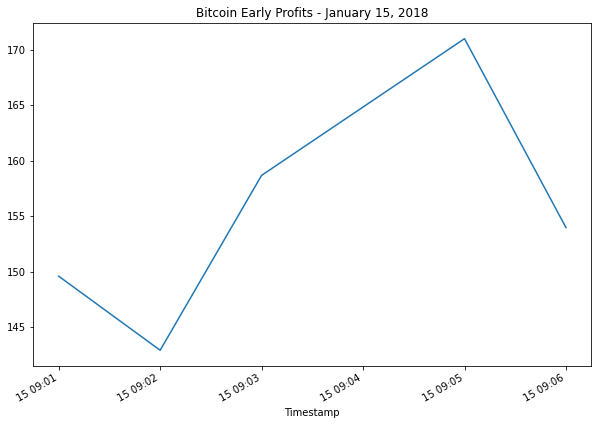

In [146]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10, 7), title="Bitcoin Early Profits - January 15, 2018")

<AxesSubplot:title={'center':'Bitcoin Middle Profits - February 15, 2018'}, xlabel='Timestamp'>

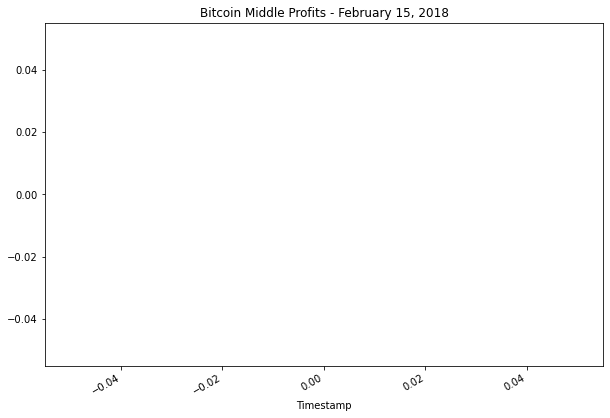

In [148]:
profit_per_trade_middle.plot(figsize=(10, 7), title="Bitcoin Middle Profits - February 15, 2018")

<AxesSubplot:title={'center':'Bitcoin Late Profits - March 31, 2018'}, xlabel='Timestamp'>

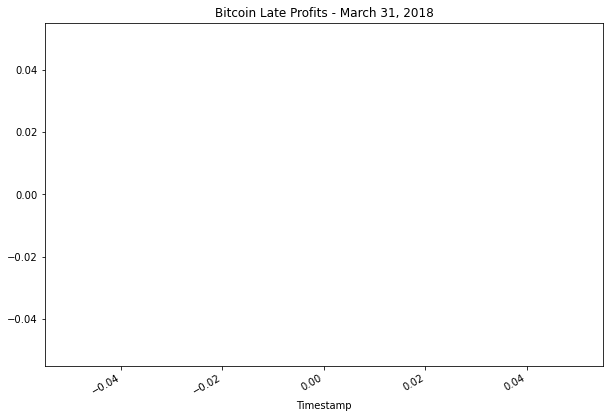

In [149]:
profit_per_trade_late.plot(figsize=(10, 7), title="Bitcoin Late Profits - March 31, 2018")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [150]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

776.1299999999992

In [151]:
profit_per_trade_middle.sum()

0.0

In [152]:
profit_per_trade_late.sum()

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [158]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early

Timestamp
2018-01-15 09:01:00    149.59
2018-01-15 09:02:00    292.51
2018-01-15 09:03:00    451.18
2018-01-15 09:05:00    622.16
2018-01-15 09:06:00    776.13
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Cumulative Bitcoin Early Profits'}, xlabel='Timestamp'>

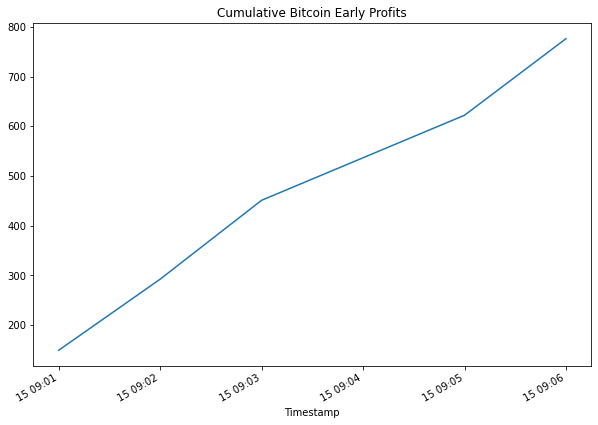

In [159]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Bitcoin Early Profits")

In [160]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle

Series([], Name: Close, dtype: float64)

<AxesSubplot:title={'center':'Cumulative Bitcoin Middle Profits'}, xlabel='Timestamp'>

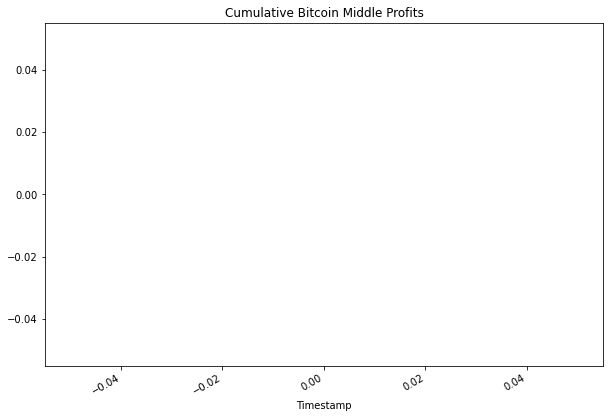

In [162]:
cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative Bitcoin Middle Profits")

In [161]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late

Series([], Name: Close, dtype: float64)

<AxesSubplot:title={'center':'Cumulative Bitcoin Late Profits'}, xlabel='Timestamp'>

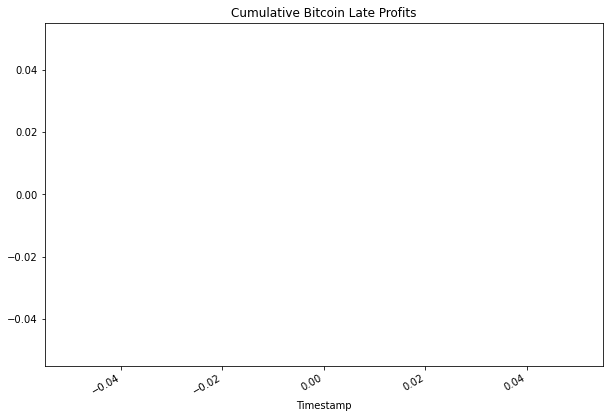

In [163]:
cumulative_profit_late.plot(figsize=(10, 7), title="Cumulative Bitcoin Late Profits")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** There appears to be no profit in the later trades.  It's a bit hard to believe and perhaps different dates would have certainly yielded different, more profitable results.  The early one in on an arbitrage opportunity is the one that makes the profit.  That's the take away message.  